# Inspiser en word2vec-modell

Installer gensim og test

In [3]:
from gensim.models import KeyedVectors
from gensim import models
from IPython.display import Markdown
import pandas as pd

Last ned modellen og ta den inn i notebooken

In [33]:
model_file = 'appfolder/models/digibok_1800-1850.kv' # eller annet filnavn - pass på sti

model = KeyedVectors.load(model_file)    #load_word2vec_format(model_file, binary=True)
#d = model.wv
#del model

Test med most_similar for forskjellige ord for evaluering.

In [32]:
model.key_to_index['og'].bit_count()

1

In [24]:
len([x for x in model.key_to_index if model.key_to_index[x] >3])

2761655

In [8]:
model.get_vector('helse')

array([-2.2655003 , -2.7335954 ,  2.3382518 ,  0.90491897, -1.092454  ,
       -0.5933758 ,  0.9386178 , -1.4529421 , -3.2095501 , -5.42064   ,
        5.080924  , -1.4620608 , -2.3976908 ,  0.15059079,  1.0496217 ,
       -1.1031585 ,  4.7365336 ,  1.6003933 ,  0.36756793,  1.2415788 ,
       -0.3915685 , -0.9368924 ,  2.295742  ,  1.1642853 ,  2.303597  ,
       -1.273042  , -0.8713483 ,  1.5805764 ,  3.390258  ,  4.983209  ,
        2.8833687 ,  3.886329  ,  2.921982  , -0.7138787 , -3.348163  ,
       -1.341756  ,  3.144157  , -1.096457  ,  0.8519767 ,  0.14382154,
        1.1545657 , -1.005668  ,  3.7145069 , -1.9548186 ,  1.8511237 ,
       -1.3385831 , -2.0918448 , -1.164659  ,  1.3763753 , -2.1168685 ],
      dtype=float32)

In [9]:
def check(word, list_of_words, model):
    def test(x,y):
        try:
            return model.rank(x,y)
        except:
            return 1000000
    res = {w: test(word, w) for w in list_of_words}
    return pd.DataFrame.from_dict(res, orient='index', columns=[word]).sort_values(by=word)

In [11]:
check('kne', "kne hofte skulder".split(),model)

,kne
kne,1
skulder,27
hofte,319


In [38]:
%%time
model.most_similar('Christiania', topn=60)

CPU times: user 665 ms, sys: 0 ns, total: 665 ms
Wall time: 34.3 ms


[('Trondhjem', 0.9095894694328308),
 ('Drammen', 0.8936776518821716),
 ('Christiansand', 0.8918492794036865),
 ('Kristiania', 0.8861502408981323),
 ('Christianssand', 0.8521625995635986),
 ('Bergen', 0.8344646096229553),
 ('Christianig', 0.8315108418464661),
 ('Arendal', 0.8189535140991211),
 ('Moss', 0.8189038634300232),
 ('Chriftiania', 0.8159880638122559),
 ('Cyristiania', 0.8129385709762573),
 ('Christignia', 0.8127741813659668),
 ('Kisbenhavn', 0.8002145290374756),
 ('Kiobenhavn', 0.7986756563186646),
 ('Cyhristiania', 0.7984078526496887),
 ('Stavanger', 0.7945932149887085),
 ('Ehriftiania', 0.7936325669288635),
 ('Kjobenhavn', 0.7901572585105896),
 ('Ehristiania', 0.7886591553688049),
 ('Molde', 0.7800152897834778),
 ('Kjøbenhavn', 0.7778527736663818),
 ('Frederikshald', 0.7775548696517944),
 ('Tronhjem', 0.7763927578926086),
 ('Frederikstad', 0.7725149393081665),
 ('Vergen', 0.7722581624984741),
 ('Throndhjem', 0.7706635594367981),
 ('Frederiksværn', 0.7675374746322632),
 ('Skie

In [114]:
T = ""
for x in "Himlen Havet Sjøen Øine Haand Aand".split():
    try:
        text = f"### {x} \n {', '.join([x[0] for x in d.most_similar(x, topn=10)])}\n\n"
    except:
        text = f"### {x} \n"
    T += text
    
Markdown(T)
    

### Himlen 
 Jorden, denne, Den, Alt, Blod, reist, Hjertet, buden, Sorg, Hende,

### Havet 
 venlig, Læben, Solen, midt, Bølgen, Smiil, Røg, hen, Slag, Stormen

### Sjøen 
 Maanen, Kong, Nattens, fagre, himmelske, ømme, springe, Øre, Carl, Øiet

### Øine 
 mørke, sig,, tusinde, medens, Konge, Livets, brød, Sol,, dybe, fine

### Haand 
 Arm, Dag, Jord, al, Graad, Aand, første, fast, Ham,, lidet

### Aand 
 liden, Dag, Haand, Arm, Blik, første, hele, ind, hvid, Sol



In [100]:
T = ""
for x in "prioritering prioriteringer ressurs ressursen ressurser legemidler legemiddel alvorlighet".split():
    try:
        text = f"### {x} \n {', '.join([x[0] for x in d.most_similar(x, topn=10)])}\n\n"
    except:
        text = f"### {x} \n"
    T += text
    
Markdown(T)
    

### prioritering 
 Vedlegg, Kapittel, Piller,, politikk, legemiddelområdet", "Prinsipper, 1997:, 7, NOU, 3

### prioriteringer 
 tilsvarende, frem, Et, norske, enkelt, arbeid, viktigste, utenfor, fire, innebærer

### ressurs 
### ressursen 
### ressurser 
 dette, større, f.eks., mer, myndighetene, langt, krav, ta, brukes, imidlertid

### legemidler 
 om, kunne, gjelder, til, når, bruke, de, ytes, opptak, legemiddel

### legemiddel 
 kunne, vil, ha, bør, når, slik, Det, viktig, om, bruke

### alvorlighet 
 innenfor, utenfor, medisinske, egen, Med, ligger, endringer, herunder, sykdom,, pasientens



In [54]:
T = ""
for x in "is".split():
    try:
        text = f"### {x} \n {', '.join([x[0] for x in d.most_similar(x, topn=10)])}\n\n"
    except:
        text = f"### {x} \n"
    T += text
    
Markdown(T)
    

### is 
 it, not, my, so, that, you, more, How, your, are



In [55]:
T = ""
for x in "vitenskap samfunnsvitenskap sosiologi sosialantropologi".split():
    try:
        text = f"### {x} \n {', '.join([x[0] for x in d.most_similar(x, topn=10)])}\n\n"
    except:
        text = f"### {x} \n"
    T += text
    
Markdown(T)
    

### vitenskap 
 filosofi, etikk, vitenskapen, fysikk, naturvitenskap, biologi, kunst, logikk, tenkning, ideologi

### samfunnsvitenskap 
 humaniora, samfunnsmedisin, helsefag, samfunnsfag, sosialantropologi, UiO, geriatri, Nordisk, skriftserie, sykepleievitenskap

### sosiologi 
 sosialantropologi, psykologi, statsvitenskap, samfunnsmedisin, sosialmedisin, antropologi, pedagogikk, biokjemi, informatikk, samfunnsvitenskap

### sosialantropologi 
 sykepleievitenskap, statsvitenskap, sosiologi, samfunnsvitenskap, samfunnsmedisin, sosialpsykologi, samfunnsfag, sosialmedisin, Psykologi, helsefag



# Make graph

In [34]:
import pandas as pd
import dhlab.graph_networkx_louvain as gnl
import networkx as nx

In [35]:
[x[0] for x in d.most_similar('Ellen', topn=30)]

NameError: name 'd' is not defined

In [70]:
def make_edges(w, topn=20, visited=None, model = None, level = 0):
    edges = []
    if w not in visited:
        visited.append(w)
        try:
            gdata =  model.most_similar(w, topn=topn)
            edges += [(w, g[0], g[1]) for g in gdata]
            #print(visited)
            if level > 0:
                #print(level)
                for g in gdata:
                    new_level = level - 1
                    edges += make_edges(g[0], topn=topn, visited = visited, model=model, level=new_level)
                    #print(new_level,edge)
        except:
            pass
            #print("problem", w)
    return edges

def graf(w, model = None, top = 20, level = 0):
    edges = make_edges(w, topn = top, visited=[], model=model,level = level)
    G = nx.DiGraph()
    G.add_weighted_edges_from(edges)
    return G

In [76]:
G = graf('Os',model=model, top=15, level = 1)

gnl.show_communities(G)

Sine-Sines :  Sine, Sines, Fødelandet, Dine, stne, sine, Fædrenelandet, dine, fine, vore, mine

os-Ham :  os, Ham, dig, Eder, Dig, hannem, Mig, mig, ham, Dem, hende, Gud, eder, Hende, Herren, Himlen, Jer, Jesum, Sder, Sig, Som, Cder, Og, Mennesket, bam, Jeg, jer

Os-dennem :  Os, dennem, deris, Bønderne, Kircken, dennom, Skiel

oss-oß :  oss, oß, theres, theth, saker, idher, swo, allom, righe, megh, Oss, gud, hafue, edher, voss

inig-o8 :  inig, o8, vs, øs, ig, oø, oøs, big, mtg, mlg, v, fs, wig, ri, dv, mg, vø, oé, dem1, sø, øos, Mennesken, ol, dg, vn, pig, kg, Oig, kder, dtg

dem-Menneskene :  dem, Menneskene, Folkene, hverandre, Hedningerne, Menneskerne, Andre, Folket



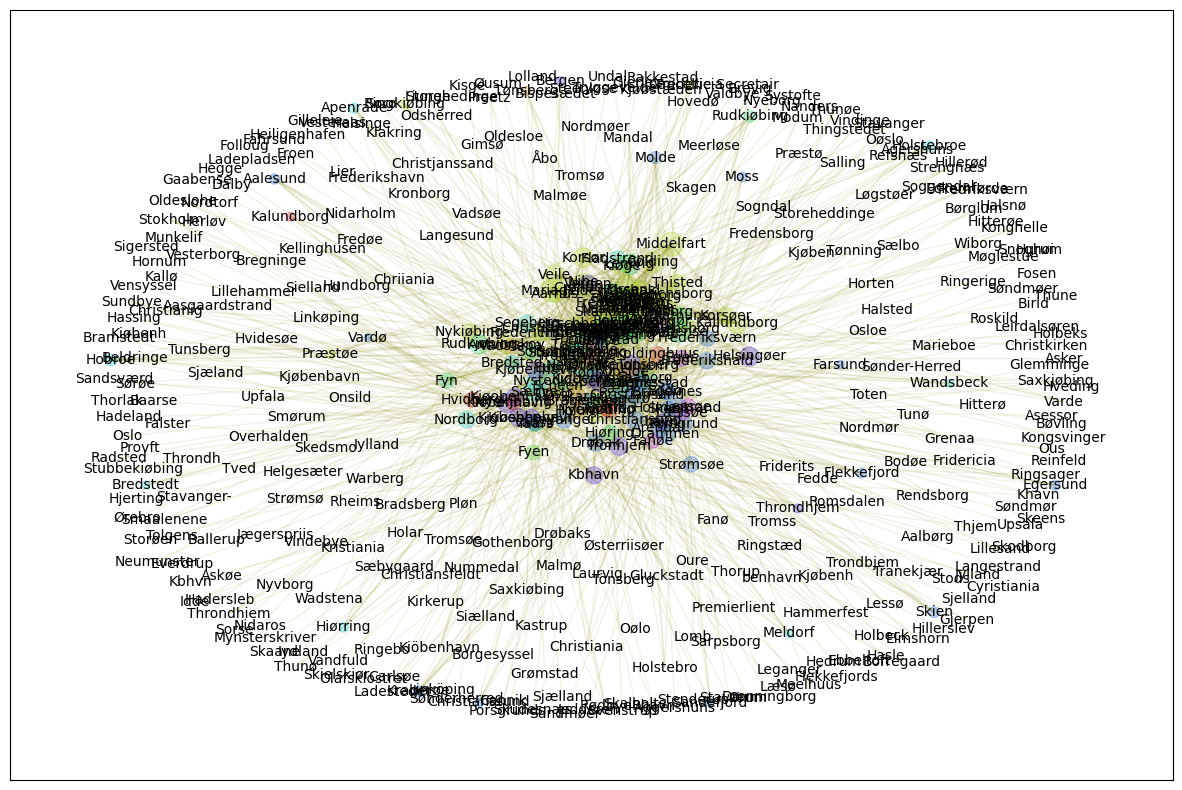

In [74]:
gnl.show_graph(G, spread=0.01)

In [64]:
from collections import Counter

In [65]:
def show_centralities(G, size=10):
    cols = [Counter(nx.betweenness_centrality(G)).most_common(size),
            Counter(nx.degree_centrality(G)).most_common(size),
            Counter(nx.in_degree_centrality(G)).most_common(size),
            Counter(nx.out_degree_centrality(G)).most_common(size)
           ]
    names = ["Betweennes", "Degree", "Indegree", "Outdegree"]
    res = zip(names, cols)
    cents = pd.concat(map(lambda x: pd.DataFrame(x[1], columns =['index', x[0]]).set_index('index'), res), axis = 1)
    return cents

In [66]:
G = graf('is', model=d,top=20)
(show_centralities(G, 20).fillna(0)
    .sort_values(by=['Degree','Indegree','Betweennes','Outdegree',], ascending=False)
    .style
    .background_gradient(axis = 1))

,Betweennes,Degree,Indegree,Outdegree
index,,,,
your,0.011359,0.336283,0.159292,0.176991
what,0.005715,0.327434,0.150442,0.176991
but,0.005105,0.327434,0.150442,0.176991
How,0.009608,0.318584,0.141593,0.176991
my,0.005732,0.318584,0.141593,0.176991
we,0.009383,0.300885,0.123894,0.176991
are,0.008059,0.292035,0.115044,0.176991
can,0.003486,0.292035,0.115044,0.176991
not,0.002427,0.292035,0.115044,0.176991


In [56]:
a = "Han drepte henne".split()
b = "Ola voldtok Marit ".split()
c = "han elsket henne".split()

In [ ]:
import numpy as np

In [57]:
m = d

In [58]:
avec = np.add.reduce([m[x] for x in a if x in m])

In [59]:
bvec = np.add.reduce([m[x] for x in b])

In [60]:
cvec = np.add.reduce([m[x] for x in c])

In [61]:
from scipy.spatial.distance import cosine

In [62]:
cosine(bvec, cvec)

0.4940808415412903

In [63]:
cosine(avec, bvec)

0.4644389748573303

In [64]:
cosine(avec, cvec)

0.06902867555618286

In [502]:
d['konge']

array([-0.09927908,  0.27863783,  0.08207181,  0.05657858, -0.13962978,
       -0.1424493 ,  0.06331921,  0.30286202, -0.17559525, -0.08047769,
        0.00869436, -0.27819964, -0.08409055, -0.01263583,  0.05935835,
       -0.01269752,  0.20533673, -0.2027495 ,  0.00431319, -0.34668076,
        0.10838543,  0.09876537,  0.17007446, -0.03127407,  0.01388995,
        0.07690159, -0.07100473,  0.00100106, -0.16169405,  0.14132574,
        0.29360393, -0.0108307 ,  0.15504372, -0.28619918, -0.02386783,
        0.12967385,  0.07731283, -0.26178336, -0.11414833, -0.24678314,
       -0.0167435 , -0.07253201, -0.14655782, -0.02129233,  0.10917688,
        0.02041457, -0.04210058,  0.08376808,  0.00634978,  0.20020379,
        0.04681044, -0.14323482, -0.09280784, -0.08289227, -0.17467651,
        0.01492229,  0.08727186, -0.0657694 , -0.25182226, -0.07195269,
        0.07373559,  0.08266725,  0.24257687, -0.03088325, -0.3018921 ,
        0.19917484,  0.14292385,  0.22228958, -0.28303838,  0.07

In [317]:
m['dronning']

array([-2.0357296 , -1.4922447 ,  1.9984303 ,  2.509681  ,  0.4678565 ,
       -0.5607563 , -0.68748707, -1.6449172 , -2.849245  , -2.738875  ,
       -0.6869653 , -1.3970499 , -3.6125734 ,  1.221389  , -1.6714805 ,
       -2.4626887 ,  0.9088261 , -0.7730676 , -1.672319  , -0.1978911 ,
       -2.8794448 ,  1.3136307 ,  3.7261515 ,  2.392581  ,  0.85708606,
        0.96473825,  1.7944518 , -1.3518511 , -4.087831  , -2.3581512 ,
       -1.5161412 , -0.9028114 , -2.1542652 ,  1.4666175 , -0.06540404,
        2.6612759 , -0.2565892 , -3.331793  , -0.28736132,  2.047924  ,
       -0.03520462,  0.6989206 , -0.40027627,  3.4016159 ,  0.3811961 ,
       -3.9728603 ,  1.3520294 ,  2.1297576 , -1.1687332 ,  1.4254082 ],
      dtype=float32)

In [336]:
kombo = (m['konge'] - m['mann']) + m['kvinne']

In [337]:
cosine(m['konge'], m['dronning'])

0.22376716136932373

In [338]:
cosine(kombo, m['dronning'])

0.23343390226364136